### Задача 
Предсказание зарплаты сотрудника по его данным.   
#### Описание датасета
Этот набор данных содержит информацию о более чем 21 тысяче работников. Информация по каждому работнику включает в себя расу, пол, рабочий класс, родную страну, время работы и т.д.

salary - это целевая переменная для прогнозирования. Она означает зарплату.
#### Ссылка на датасет:
Salary https://www.kaggle.com/datasets/ayessa/salary-prediction-classification

In [1]:
import sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

**Загрузка датасета**

In [2]:
df = pd.read_csv('salary.csv')
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
1,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
2,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
3,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
4,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
5,37,Private,280464,Some-college,10,Married-civ-spouse,Execs-managerial,Husband,Black,Male,0,0,80,United-States,>50K
6,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
7,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
8,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
9,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K


In [3]:
#первичная обработка
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000
mean,21.546404,3.873770,7871.320590,10.293943,9.068449,2.614441,7.164003,1.445447,3.668971,0.670436,6.328099,1.979854,39.357218,35.763884,0.239595
std,13.586784,1.451805,4537.631267,3.866895,2.579103,1.502596,4.661748,1.603985,0.843871,0.470065,22.699910,9.706025,12.105608,7.644198,0.426846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,4017.000000,9.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,38.000000,0.000000
50%,20.000000,4.000000,7787.000000,11.000000,9.000000,2.000000,8.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,38.000000,0.000000
75%,31.000000,4.000000,11656.000000,12.000000,11.000000,4.000000,11.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,38.000000,0.000000
max,71.000000,8.000000,16107.000000,15.000000,15.000000,6.000000,15.000000,5.000000,4.000000,1.000000,115.000000,85.000000,90.000000,40.000000,1.000000


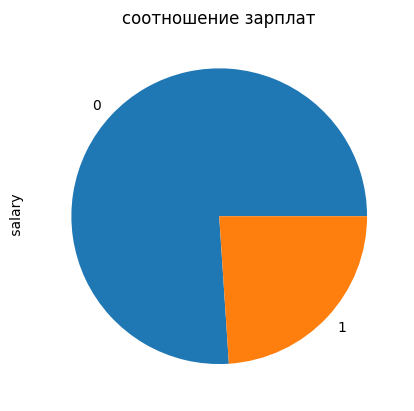

In [4]:
plt.figure()
pd.Series(df[' salary']).value_counts().sort_index().plot(kind = 'pie')
plt.title('соотношение зарплат');

Балансируем датасет:

In [5]:
import random

random.seed()
inp = open("salary.csv", "r")
file = open("dataset.csv", "w")
while True:
    line = inp.readline()
    if not line:
        break
    params = line.split(", ")
    if params[14] == ">50K\n" or params[14] == "salary\n" or random.randint(1, 3) < 2:
        file.write(line)
inp.close()
file.close()

In [6]:
df = pd.read_csv('dataset.csv')
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

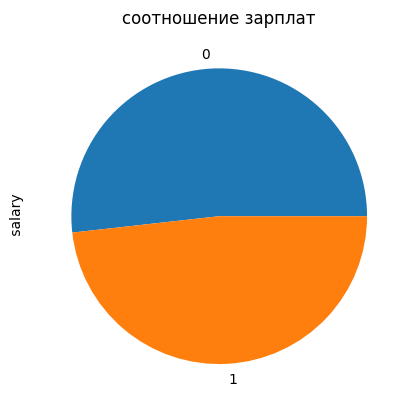

In [7]:
plt.figure()
pd.Series(df[' salary']).value_counts().sort_index().plot(kind = 'pie')
plt.title('соотношение зарплат');

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10848 entries, 0 to 10847
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              10848 non-null  int64
 1    workclass       10848 non-null  int64
 2    fnlwgt          10848 non-null  int64
 3    education       10848 non-null  int64
 4    education-num   10848 non-null  int64
 5    marital-status  10848 non-null  int64
 6    occupation      10848 non-null  int64
 7    relationship    10848 non-null  int64
 8    race            10848 non-null  int64
 9    sex             10848 non-null  int64
 10   capital-gain    10848 non-null  int64
 11   capital-loss    10848 non-null  int64
 12   hours-per-week  10848 non-null  int64
 13   native-country  10848 non-null  int64
 14   salary          10848 non-null  int64
dtypes: int64(15)
memory usage: 1.2 MB


In [9]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000
mean,23.451788,3.062039,4362.278853,10.456951,9.543603,2.445151,7.343658,1.205015,3.705107,0.730457,9.029683,2.213496,40.032264,35.806969,0.482301
std,12.951587,1.164265,2492.079267,3.604284,2.622167,1.353571,4.613292,1.618496,0.809141,0.443743,25.201554,9.117254,11.469701,7.674342,0.499710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,3.000000,2252.750000,9.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,38.000000,38.000000,0.000000
50%,23.000000,3.000000,4316.000000,11.000000,9.000000,2.000000,8.000000,0.000000,4.000000,1.000000,0.000000,0.000000,38.000000,38.000000,0.000000
75%,32.000000,3.000000,6463.250000,12.000000,12.000000,4.000000,11.000000,2.000000,4.000000,1.000000,0.000000,0.000000,46.000000,38.000000,1.000000
max,69.000000,7.000000,8828.000000,15.000000,15.000000,6.000000,15.000000,5.000000,4.000000,1.000000,99.000000,64.000000,83.000000,40.000000,1.000000


In [10]:
df.value_counts()

age   workclass   fnlwgt   education   education-num   marital-status   occupation   relationship   race   sex   capital-gain   capital-loss   hours-per-week   native-country   salary
2    3           2873     15          9               4                1            3              4      0     0              0              9                38               0          2
0    0           886      0           5               4                0            3              4      1     0              0              29               38               0          1
29   3           3747     15          9               2                4            0              4      1     0              0              38               38               1          1
                 3492     8           10              0                14           4              2      0     0              3              38               38               0          1
                 3552     9           12              2     

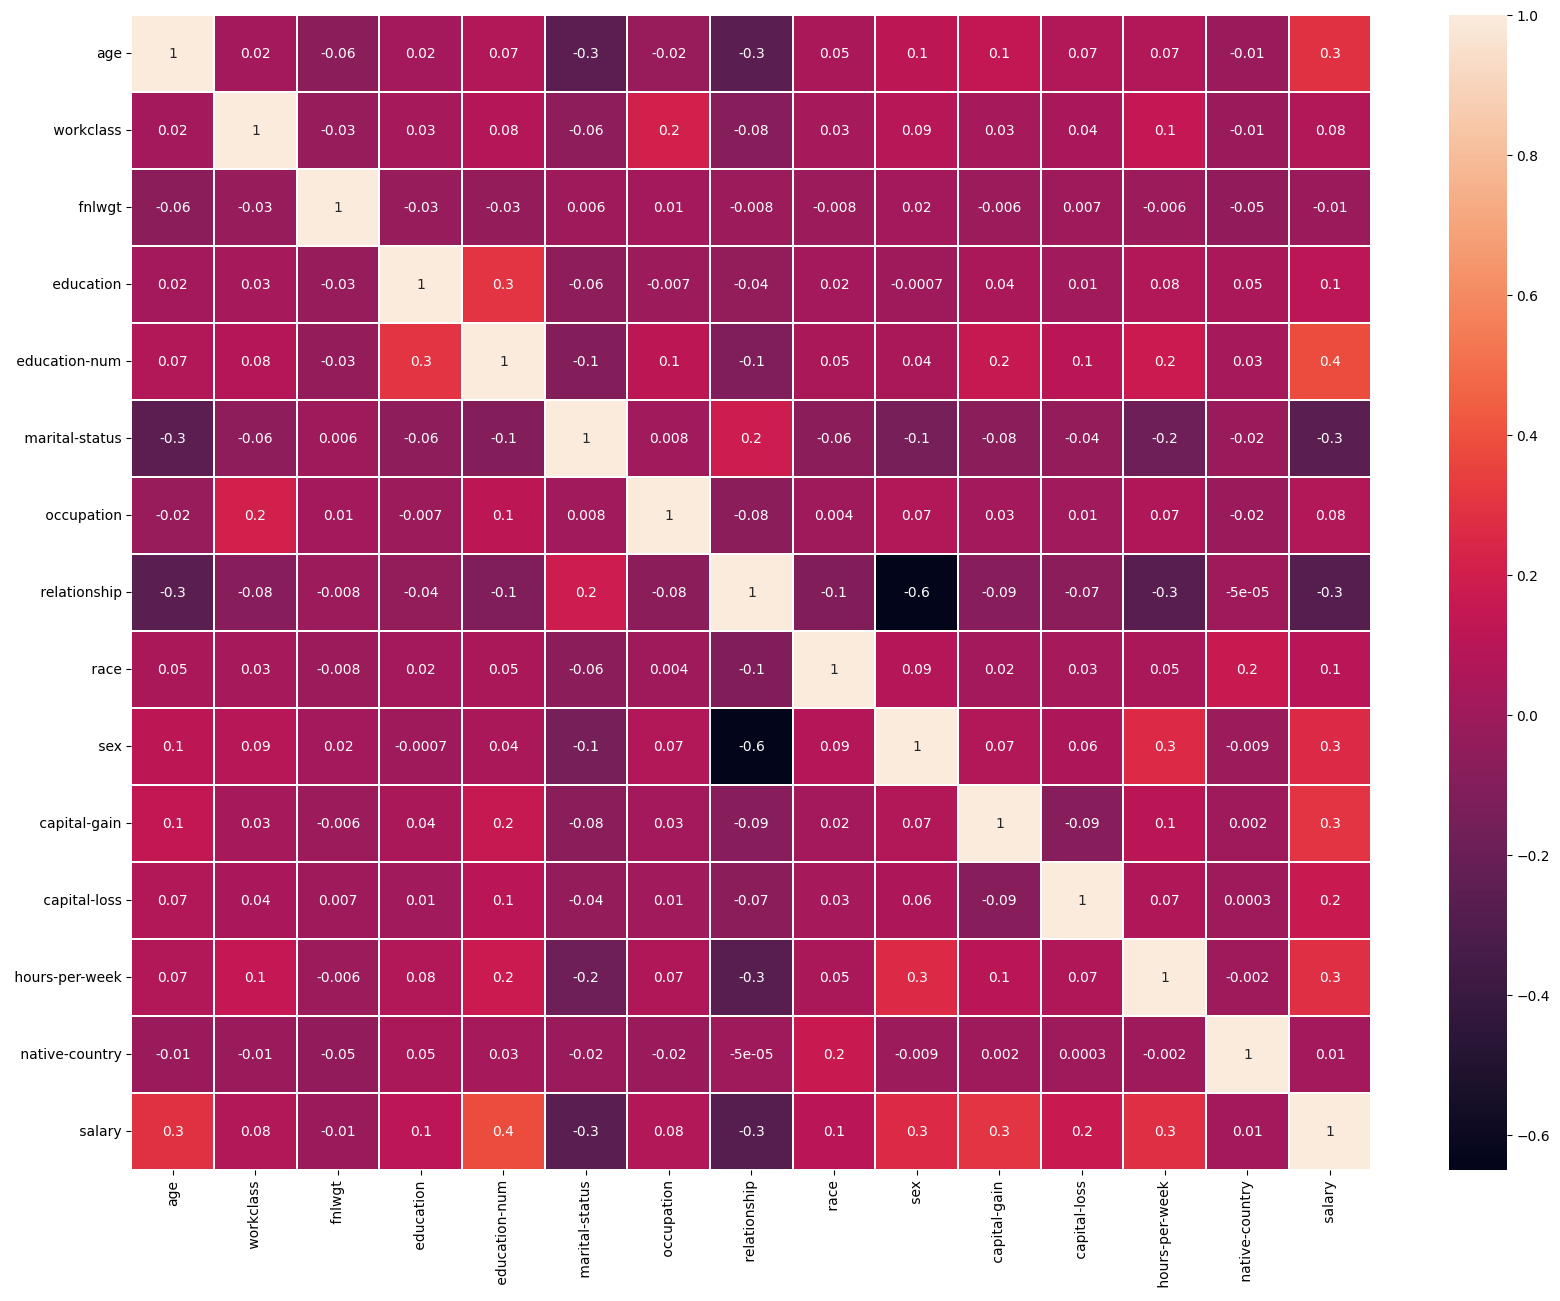

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1, annot=True, fmt='.1g')
plt.yticks(rotation=0);

#### Вывод
Найденный мною датасет обладает дастаточным количеством данных (данные имеют категариальные признаки, одако уже преобразованны к числовому виду), матрица кореляций показывает что у параметра ```education-num``` имеется заметная корреляция с зарплатой.